# Lab Exercise 1 - Covid 19 Data

In [16]:
# importing all the relevant packages to complete my project
import pandas as pd # Pandas to be able to create and manipulate dataframes
import numpy as np # used for any mathematical functions that may be needed
import seaborn as sns # used for effective plotting with pandas
import plotly_express as px # used for a more interactive plotting
import matplotlib.pyplot as plt # used in conjunction with seaborn

In [17]:
# importing excel file from my data file from data downloaded from government website about covid 19
# This also creates a dataframe
df_covid_week_sweden = pd.read_excel("../Lab_Covid/Data/Folkhalsomyndigheten_Covid19.xlsx", "Veckodata Riket")
df_covid_week_sweden.head() #showing the first part of the dataframe

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


---
### a) Exploring the data frame with exploitative operators

In [18]:
# viewing information about the data. There are no NaNs and all data is either an int or a float.
df_covid_week_sweden.info(), df_covid_week_sweden.describe(), df_covid_week_sweden.value_counts(), df_covid_week_sweden.columns, df_covid_week_sweden.index
# There are 13 columns with a total of 142 different entries 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

(None,
                 år  veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  \
 count   142.000000   142.000000        142.000000                  142.000000   
 mean   2020.957746    26.035211      18378.345070                  177.197183   
 std       0.797809    14.228835      38569.455753                  371.689114   
 min    2020.000000     1.000000          0.000000                    0.000000   
 25%    2020.000000    14.000000       3075.000000                   30.000000   
 50%    2021.000000    26.000000       5531.000000                   53.000000   
 75%    2022.000000    37.750000      21125.000000                  203.500000   
 max    2022.000000    53.000000     265043.000000                 2554.000000   
 
        Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  \
 count                    142.000000    1.420000e+02          142.000000   
 mean                     354.169014    1.125288e+06        10843.281690   
 std                     

---
### b) Incorporating the week and year column with letter v inserted to represent week

In [19]:
# line 2 creates new column 0 as vecka then joins the two coloumns vecka and år as a string with a v in the middle
df_covid_week_sweden.insert(0, "Vecka", df_covid_week_sweden["år"].astype(str) + "v" + df_covid_week_sweden["veckonummer"].astype(str))

df_covid_week_sweden.pop("år") # This will remove the original "år" column
df_covid_week_sweden.pop("veckonummer") # This will remove the "veckonummer column"
df_covid_week_sweden # showing the new dataframe

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022v38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976
138,2022v39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000
139,2022v40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024
140,2022v41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000


---
### Exercises c) through to f) will now visualize the data using seaborn and plotly express

---
#### c) visualising a line digram that shows the deceased from Covid 19 from 2020v6 to present

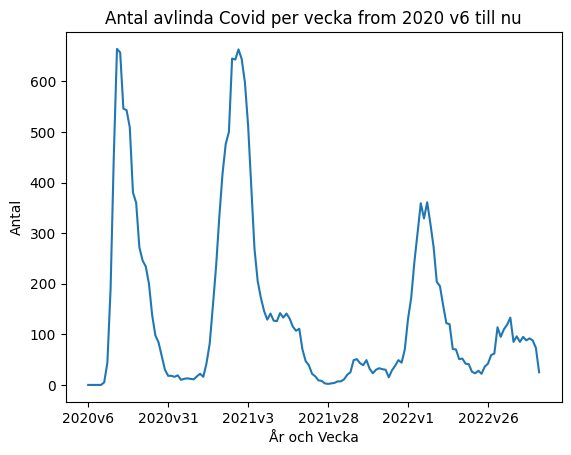

In [20]:
# Seaborn plot
ax = plt.axes() # subplots for the graph
sns.lineplot(x = "Vecka", y = "Antal_avlidna_vecka", data=df_covid_week_sweden) # Entering the dataframe and which colums to plot from it
ax.xaxis.set_major_locator(plt.MaxNLocator(7)) # This reduces the axis range so it is more readable
ax.set(title= "Antal avlinda Covid per vecka from 2020 v6 till nu", xlabel= "År och Vecka", ylabel= "Antal") # Setting titles and labels for the graph
plt.savefig("Visualiseringar/Antal_avlidna_vecka") # Saving the graph as a png file

In [21]:
# Plotting with plotly express the same data
avlinda = px.line(
    df_covid_week_sweden, # entering dataframe to plot from
    x="Vecka", # entering what column the x axis will plot from
    y="Antal_avlidna_vecka", # entering what column the y axis will plot from
    title="Antal avlinda Covid per vecka from 2020 v6 till nu", # setting the title
    labels={"Vecka": "År och Vecka", "Antal_avlidna_vecka": "Antal"}, # changinng the name of the labels
)
avlinda.show() # Showing the plot
avlinda.write_html("Visualiseringar/Antal_avlinda_vecka.html") # saving the plot as an html file that can be viewed on web browser


---
#### d) Drawing a line graph which shows the new cases of Covid 19 per week from 2020 week 6 to present.

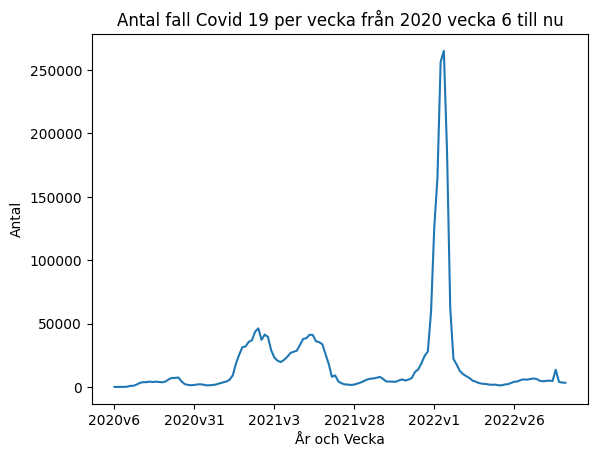

In [22]:
# seaborn plot
ax = plt.axes()

sns.lineplot(x = "Vecka", y = "Antal_fall_vecka", data=df_covid_week_sweden)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.set(title= "Antal fall Covid 19 per vecka från 2020 vecka 6 till nu", xlabel="År och Vecka", ylabel= "Antal")
plt.savefig("Visualiseringar/Antal_fall_covid_per_vecka")

In [23]:
# plotly express
fall = px.line(
    df_covid_week_sweden,
    x="Vecka",
    y="Antal_fall_vecka",
    title="Antal fall Covid 19 per vecka från 2020 vecka 6 till nu",
    labels={"Vecka":"År och Vecka", "Antal_fall_vecka":"Antal"},
)
fall.show()
avlinda.write_html("Visualiseringar/Antal_fall_covid_per_vecka.html")

----
#### e) Drawing a line diagram which shows both deceased cases and new cases per week from year 2020 week 6 to now

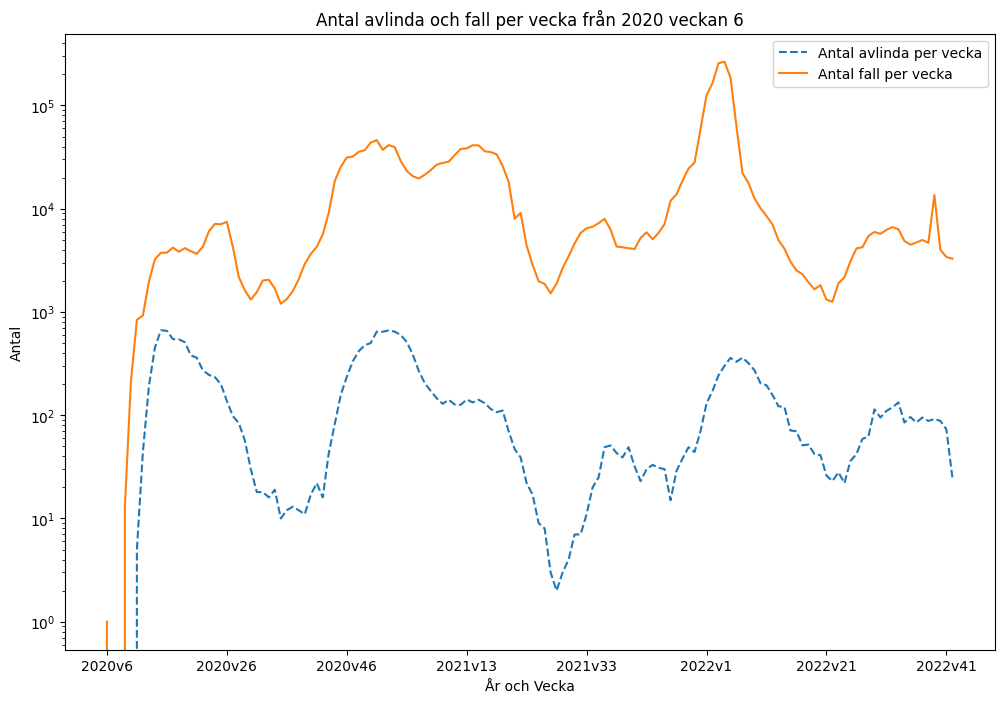

In [24]:
# seaborn plot
fig, ax = plt.subplots(figsize =(12,8)) # fixing subplots to show more that one plot. Fig size creates the size of the graph
# Using line style dash to make sure the line is distinguised for people who may have color impairment.
ax = sns.lineplot(x = "Vecka", y = "Antal_avlidna_vecka", data=df_covid_week_sweden, label= "Antal avlinda per vecka", linestyle="dashed")
ax = sns.lineplot(x = "Vecka", y = "Antal_fall_vecka", data=df_covid_week_sweden, label="Antal fall per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # setting max locator again to display dates better
ax.set(xlabel = "År och Vecka", ylabel="Antal", title= "Antal avlinda och fall per vecka från 2020 veckan 6")
ax.set_yscale('log') # using a logical scale operator on the y axis as the tow sets of data differ greatly in scale. The fall(cases) were in millions compared to deaths under millions

plt.savefig("Visualiseringar/Antal_avlinda_fall_covid_per_vecka")
#https://www.easytweaks.com/python-plot-multiple-lines-matplotlib-seaborn/ # Used this site to get help in plotting two lines on the graph

In [25]:
# plotly express
fig = px.line(
    df_covid_week_sweden,
    x="Vecka",
    y=["Antal_avlidna_vecka", "Antal_fall_vecka"], # this plot requires two y entries
    title="Antal avlinda och fall per vecka från 2020 veckan 6",
    labels={"Vecka":"År och Vecka"}
)
fig.update_yaxes(title_text="Antal", type="log") # Using log again on this chart as well
fig.write_html("Visualiseringar/Antal_avlinda_fall_covid_per_vecka.html")
fig.show() 

----
#### f) Draw a line diagram with the cumulative amount of cases of Covid 19 from 2020 week 6 till now

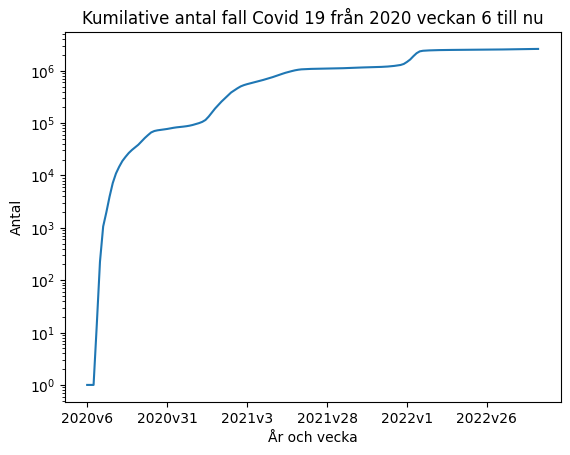

In [26]:
# seaborn plot
ax = plt.axes()

sns.lineplot(x = "Vecka", y = "Kum_antal_fall", data=df_covid_week_sweden)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.set(title= "Kumilative antal fall Covid 19 från 2020 veckan 6 till nu",xlabel= "År och vecka", ylabel="Antal")
ax.set_yscale('log') #using log again as the numbers were from a low number to a very high number
plt.savefig("Visualiseringar/Kumilative_antal_fall_covid_per_vecka")

In [27]:
# Plotly express
kum_fall = px.line(
    df_covid_week_sweden,
    x="Vecka",
    y="Kum_antal_fall",
    title="Kumilative antal fall Covid 19 från 2020 veckan 6 till nu",
    labels={"Vecka":"År och Vecka", "Kum_antal_fall":"Antal"},
)
fig.write_html("Visualiseringar/Kumilative_antal_fall_covid_per_vecka.html")
kum_fall.show()


----
#### grouping all data graphs 2x2 subplot for seaborn and 1x4 for plotly express 

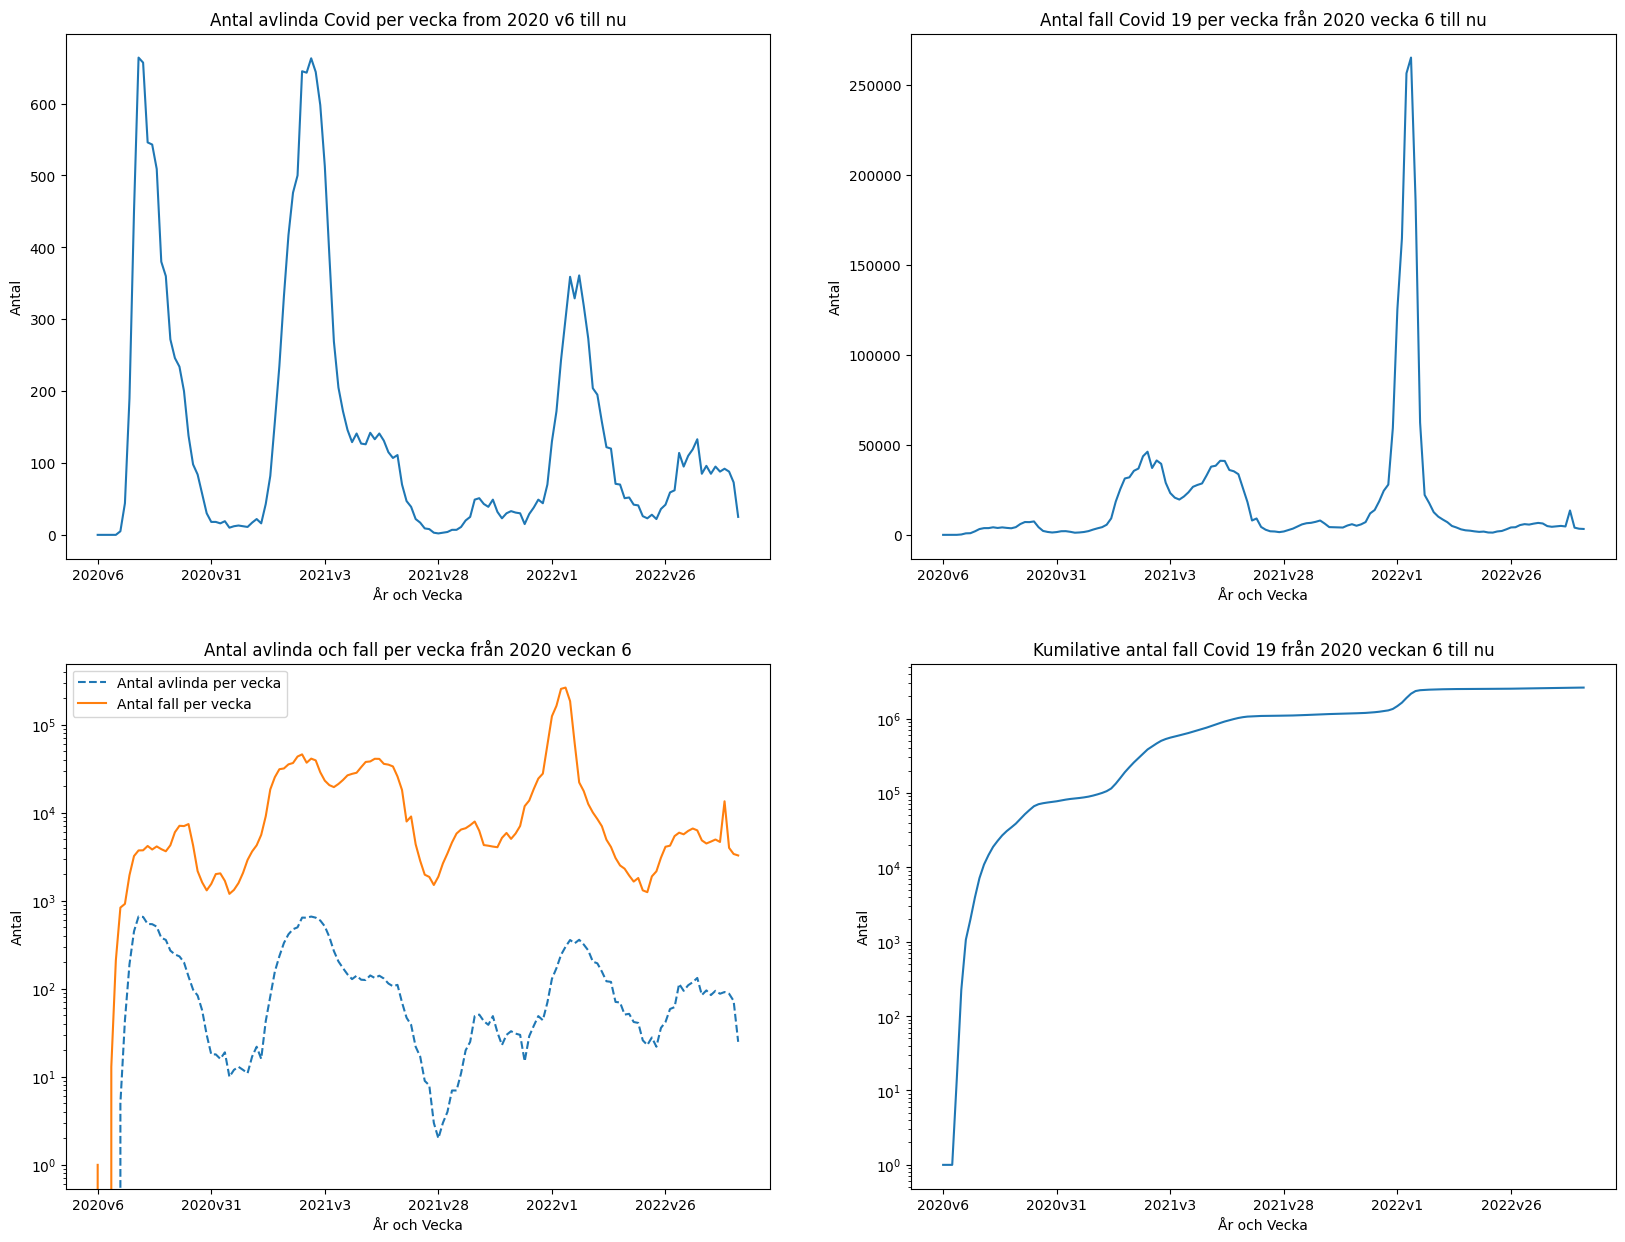

In [28]:
fig, ax = plt.subplots(2,2, figsize = (20,15)) # using sybplots to plot all 4 graphs on a 2x2 grid. 
# I set rhe axis and titles refering to the area on the 2 x 2 grid, eg [0,1] Top right, 0 is the row 1 is the column.

# graph 1
sns.lineplot(ax = ax[0,0], x = "Vecka", y = "Antal_avlidna_vecka", data=df_covid_week_sweden)
ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[0,0].set(title= "Antal avlinda Covid per vecka from 2020 v6 till nu", xlabel= "År och Vecka", ylabel= "Antal")

# graph 2
sns.lineplot(ax = ax[0,1], x = "Vecka", y = "Antal_fall_vecka", data=df_covid_week_sweden)
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[0,1].set(title= "Antal fall Covid 19 per vecka från 2020 vecka 6 till nu", xlabel="År och Vecka", ylabel= "Antal")

#graph 3
sns.lineplot(ax=ax[1,0], x = "Vecka", y = "Antal_avlidna_vecka", data=df_covid_week_sweden, label= "Antal avlinda per vecka", linestyle="dashed")
sns.lineplot(ax=ax[1,0], x = "Vecka", y = "Antal_fall_vecka", data=df_covid_week_sweden, label="Antal fall per vecka")
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[1,0].set(xlabel = "År och Vecka", ylabel="Antal", title= "Antal avlinda och fall per vecka från 2020 veckan 6")
ax[1,0].set_yscale('log')

#graph 4
sns.lineplot(ax= ax[1,1], x = "Vecka", y = "Kum_antal_fall", data=df_covid_week_sweden)
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[1,1].set(title= "Kumilative antal fall Covid 19 från 2020 veckan 6 till nu", xlabel= "År och Vecka", ylabel= "Antal")
ax[1,1].set_yscale('log')

plt.savefig("Visualiseringar/Graphdata_grouped_subplot")

In [29]:
# Here i am arranging the graphs in a 1x4 pattern
avlinda.show()
fall.show()
fig.show()
kum_fall.show()

C:\Users\Sam Glass ITHS\AppData\Local\Temp\ipykernel_7424\1594489828.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



References and research: 
- https://www.statology.org/
- https://plotly.com/
- https://www.geeksforgeeks.org/
- https://stackoverflow.com/

These were the main websites that I have used within the projects to help with coding ideas and methods.